In [1]:
import matplotlib.pyplot as plt
import numpy as np

[]

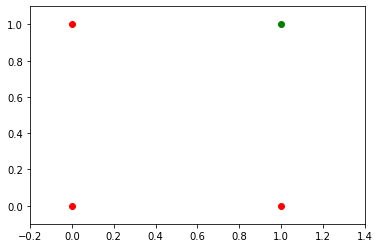

In [2]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m* X + 1.2, label="decision boundary")
plt.plot()

[]

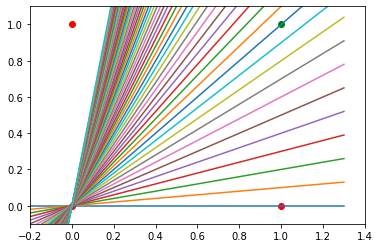

In [3]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0, 6, 0.1):
    ax.plot(X, m*X)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

[]

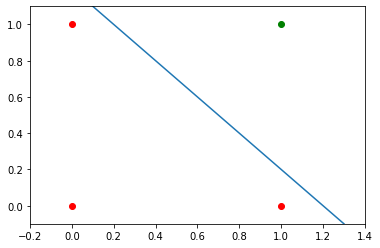

In [4]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c)
plt.plot()

In [5]:
from collections import Counter

In [6]:
class Perceptron:
    
    def __init__(self, 
                 weights,
                 bias=1,
                 learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if  x <= 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights[:-1] * in_data
        weighted_sum = weighted_input.sum()
        weighted_sum += self.weights[-1] * self.bias
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  # 
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate( (in_data, [self.bias]) )
            correction = error * in_data * self.learning_rate
            self.weights += correction
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            result = self(data[index])
            if result == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

In [7]:
def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2,))
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)

In [173]:
"""
Numerous iteration with variable data set helps to reach to a stable
weight
"""

p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.3)

for in_data, label in labelled_samples(30):
    a = p(in_data)
    p.adjust(label, 
             a, 
             in_data)

test_data, test_labels = list(zip(*labelled_samples(30)))

p.evaluate(test_data, test_labels)

Counter({'correct': 30})

-1.0 1.0


[]

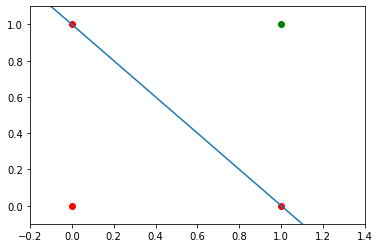

In [174]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()

In [175]:
from sklearn.datasets import make_blobs

In [176]:
samples, labels = make_blobs(n_samples=250,
                             centers = ([2.5,3], [6.7,7.9]),
                             random_state=0)

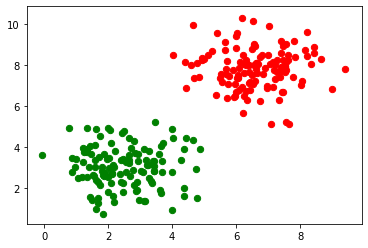

In [177]:
colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels == n_class][:,0], samples[labels==n_class][:, 1],
              c=colours[n_class],s=40,label=str(n_class))

In [178]:
p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.4)

for i in range(len(samples)-100):
    p.adjust(labels[i],
            p(samples[i]),
             samples[i])
    
print(p.weights)
p.evaluate(samples[-100:], labels[-100:])

[ 2.49855239  0.96119957 -8.9       ]


Counter({'correct': 77, 'wrong': 23})